In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statistics import mean
from sklearn.metrics import confusion_matrix

# load data set
screen = pd.read_csv('screening.csv',header = 0,usecols=['customer_id','gender','date','value'])
screen = screen.rename(columns = {'date':'most_recent_order_date','value':'order_count'})
# sort by customer id
screen = screen.sort_values(by=['customer_id'])
screen.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,1/1/2017 0:11,198.5
1,1001,0,1/1/2017 0:29,338.0
2,1002,1,1/1/2017 1:30,733.0
1742,1002,1,2/19/2017 21:35,176.0
928,1002,1,1/23/2017 4:33,148.6
3,1003,1,1/1/2017 1:34,772.0
676,1003,1,1/20/2017 5:56,425.5
4292,1003,1,4/25/2017 9:54,0.0
4323,1003,1,4/26/2017 2:37,704.0
4,1004,0,1/1/2017 3:11,508.0


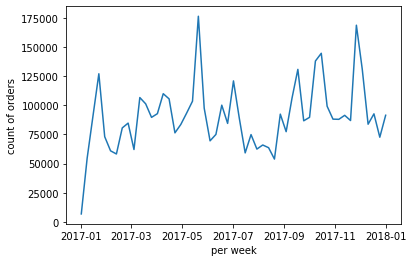

In [67]:
# transform to weekly data
# calculate the sum of orders
screen['most_recent_order_date'] = pd.to_datetime(screen['most_recent_order_date'])
order_week = screen.set_index('most_recent_order_date').resample('W').sum()
plt.plot(order_week['order_count'])
plt.ylabel('count of orders')
plt.xlabel('per week')
plt.show()

In [45]:
# mean order varying from gender
# select target columns
mean_raw = screen.loc[:,['gender','order_count']]
# calcute the mean
means_0 = mean_raw.groupby('gender').mean()
means_0

,order_count
gender,
0,363.890006
1,350.708361


From the chart above, we can see there is no big difference between these two genders.

In [66]:
# compute the confusion matrix
conf_raw = pd.read_csv('screening.csv', header = 0, usecols=['gender','predicted_gender'])
conf = confusion_matrix(conf_raw['gender'],conf_raw['predicted_gender'])

accuracy = (conf[0,0]+conf[1,1])/(conf[0,0]+conf[1,1]+conf[0,1]+conf[1,0])
recall = conf[0,0]/(conf[0,0]+conf[0,1])
precision = conf[0,0]/(conf[0,0]+conf[1,0])

# print the confusion matrix
print(conf)
# print the classification values
print(accuracy)
print(recall)
print(precision)

[[3349 3410]
 [1463 5249]]
0.6382599658525722
0.495487498150614
0.6959684123025769


The accuracy is not bad, which means that the prediction is accurate more than half out of samples. However, given that recall is lower than precision, the prediction did miss a lot of positive examples.

### E
When faced with different models, ROC curve can be a useful summary for 
classifiers. The ideal curve will be close to top left, which has a high recall. For example, when conducting naive forecast and decision tree forecast, the naive forecast will be close to the diagonal line in ROC, while usually decision tree has a better prediction result which is more close to the top left.